

# <center>Welcome in Branch and Bound Applied to FSP</center>

### Packages importing & data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils_branch_bound import read_flow_shop_data

In [3]:
instances = read_flow_shop_data('./../data/tai20_5.txt', 5, 20)

In [4]:
instances

[(5,
  20,
  array([[54, 83, 15, 71, 77, 36, 53, 38, 27, 87, 76, 91, 14, 29, 12, 77,
          32, 87, 68, 94],
         [79,  3, 11, 99, 56, 70, 99, 60,  5, 56,  3, 61, 73, 75, 47, 14,
          21, 86,  5, 77],
         [16, 89, 49, 15, 89, 45, 60, 23, 57, 64,  7,  1, 63, 41, 63, 47,
          26, 75, 77, 40],
         [66, 58, 31, 68, 78, 91, 13, 59, 49, 85, 85,  9, 39, 41, 56, 40,
          54, 77, 51, 31],
         [58, 56, 20, 85, 53, 35, 53, 41, 69, 13, 86, 72,  8, 49, 47, 87,
          58, 18, 68, 28]])),
 (5,
  20,
  array([[26, 38, 27, 88, 95, 55, 54, 63, 23, 45, 86, 43, 43, 40, 37, 54,
          35, 59, 43, 50],
         [59, 62, 44, 10, 23, 64, 47, 68, 54,  9, 30, 31, 92,  7, 14, 95,
          76, 82, 91, 37],
         [78, 90, 64, 49, 47, 20, 61, 93, 36, 47, 70, 54, 87, 13, 40, 34,
          55, 13, 11,  5],
         [88, 54, 47, 83, 84,  9, 30, 11, 92, 63, 62, 75, 48, 23, 85, 23,
           4, 31, 13, 98],
         [69, 30, 61, 35, 53, 98, 94, 33, 77, 31, 54, 71, 78,  9, 

### Test with a simple instance

In [5]:
from utils_branch_bound import FlowShopBranchBoundSolver
# from utils_branch_bound import johnson_method
# from utils_branch_bound import all_permutations

In [6]:
instance_test =  '''\
20 5 873654221 1278 1232
54 83 15 71 77
79  3 11 99 56
16 89 49 15 89
'''
instance_array = np.array([
    [54, 83, 15, 71, 77],
    [79, 3, 11, 99, 56],
    [16, 89, 49, 15, 89]
])

In [7]:
solver = FlowShopBranchBoundSolver()

solver.consider_instance(instance_array)

solver.solve(list(range(5)))

bound = \
    solver.compute_lower_bound(list(range(5)))


print("makspan :",solver.bound)
print("Solution :", solver.intial_solution)

Optimal Solution: [2, 1, 3, 4, 0]
Optimal Cost: 373.0
makspan : 373.0
Solution : [2, 1, 3, 4, 0]


In [8]:
all_p = solver.all_permutations(list(range(5)))
print(all_p)

[[0, 1, 2, 3, 4], [0, 1, 2, 4, 3], [0, 1, 3, 2, 4], [0, 1, 3, 4, 2], [0, 1, 4, 2, 3], [0, 1, 4, 3, 2], [0, 2, 1, 3, 4], [0, 2, 1, 4, 3], [0, 2, 3, 1, 4], [0, 2, 3, 4, 1], [0, 2, 4, 1, 3], [0, 2, 4, 3, 1], [0, 3, 1, 2, 4], [0, 3, 1, 4, 2], [0, 3, 2, 1, 4], [0, 3, 2, 4, 1], [0, 3, 4, 1, 2], [0, 3, 4, 2, 1], [0, 4, 1, 2, 3], [0, 4, 1, 3, 2], [0, 4, 2, 1, 3], [0, 4, 2, 3, 1], [0, 4, 3, 1, 2], [0, 4, 3, 2, 1], [1, 0, 2, 3, 4], [1, 0, 2, 4, 3], [1, 0, 3, 2, 4], [1, 0, 3, 4, 2], [1, 0, 4, 2, 3], [1, 0, 4, 3, 2], [1, 2, 0, 3, 4], [1, 2, 0, 4, 3], [1, 2, 3, 0, 4], [1, 2, 3, 4, 0], [1, 2, 4, 0, 3], [1, 2, 4, 3, 0], [1, 3, 0, 2, 4], [1, 3, 0, 4, 2], [1, 3, 2, 0, 4], [1, 3, 2, 4, 0], [1, 3, 4, 0, 2], [1, 3, 4, 2, 0], [1, 4, 0, 2, 3], [1, 4, 0, 3, 2], [1, 4, 2, 0, 3], [1, 4, 2, 3, 0], [1, 4, 3, 0, 2], [1, 4, 3, 2, 0], [2, 0, 1, 3, 4], [2, 0, 1, 4, 3], [2, 0, 3, 1, 4], [2, 0, 3, 4, 1], [2, 0, 4, 1, 3], [2, 0, 4, 3, 1], [2, 1, 0, 3, 4], [2, 1, 0, 4, 3], [2, 1, 3, 0, 4], [2, 1, 3, 4, 0], [2, 1, 4, 0, 

In [9]:
import math
bound = math.inf
solution = None
for i in all_p:
    gg = solver.compute_lower_bound(i)
    if gg < bound:
        bound = gg
        solution = i
        
print("makspan :",bound)
print("Solution :", solution)

makspan : 373.0
Solution : [2, 1, 3, 4, 0]


### Test B&B with First solution using Johnson

In [10]:
from utils_branch_bound import johnson_method
solver.consider_instance(instances[0][2][:2, :8])
solution = johnson_method(instances[0][2][:2, :8].T)

makspan = solver.compute_lower_bound(solution)

print("makspan :",makspan)
print("Solution :", solution)

makspan : 526.0
Solution : [5, 7, 6, 0, 3, 4, 2, 1]


In [11]:
''' this is only to confirm that our branch and bound is working correctly comparing to
the solution of the johnson method for 2 machine flowshop problem

'''
solver = FlowShopBranchBoundSolver()


solver.consider_instance(instances[0][2][:2,:8])


solver.solve(list(range(8)))

makspan = solver.compute_lower_bound(solver.intial_solution)

print("makspan :",makspan)
print("Solution :", solution)

# print(solver.intial_solution)

Optimal Solution: [5, 0, 2, 3, 4, 6, 1, 7]
Optimal Cost: 526.0
makspan : 526.0
Solution : [5, 7, 6, 0, 3, 4, 2, 1]


In [12]:

solver = FlowShopBranchBoundSolver()


solver.consider_instance(instances[0][2][:,:8])


solver.solve(list(range(8)))

makspan = solver.compute_lower_bound(solver.intial_solution)

print("makspan :",makspan)
print("Solution :", solution)

# print(solver.intial_solution)

Optimal Solution: [5, 1, 3, 4, 2, 6, 0, 7]
Optimal Cost: 681.0
makspan : 681.0
Solution : [5, 7, 6, 0, 3, 4, 2, 1]


### Test with benchmark tai **20**_**5**

In [13]:
johnson_solution = johnson_method(instances[0][2][:2, :].T)
solver.consider_instance(instances[0][2])
makspan = solver.compute_lower_bound(johnson_solution)

print("makspan :",makspan)
print("Solution :", johnson_solution)

makspan : 1659.0
Solution : [14, 12, 13, 5, 7, 6, 0, 3, 17, 19, 11, 9, 4, 16, 15, 2, 18, 8, 10, 1]


In [14]:
# solver = FlowShopBranchBoundSolver()
# solver.consider_instance(instances[0][2])
# solver.solve(johnson_solution)
# makspan = solver.compute_lower_bound(solver.intial_solution)
# 
# print("makspan :",makspan)
# print("Solution :", solution)

### Ploting of gantt of the results

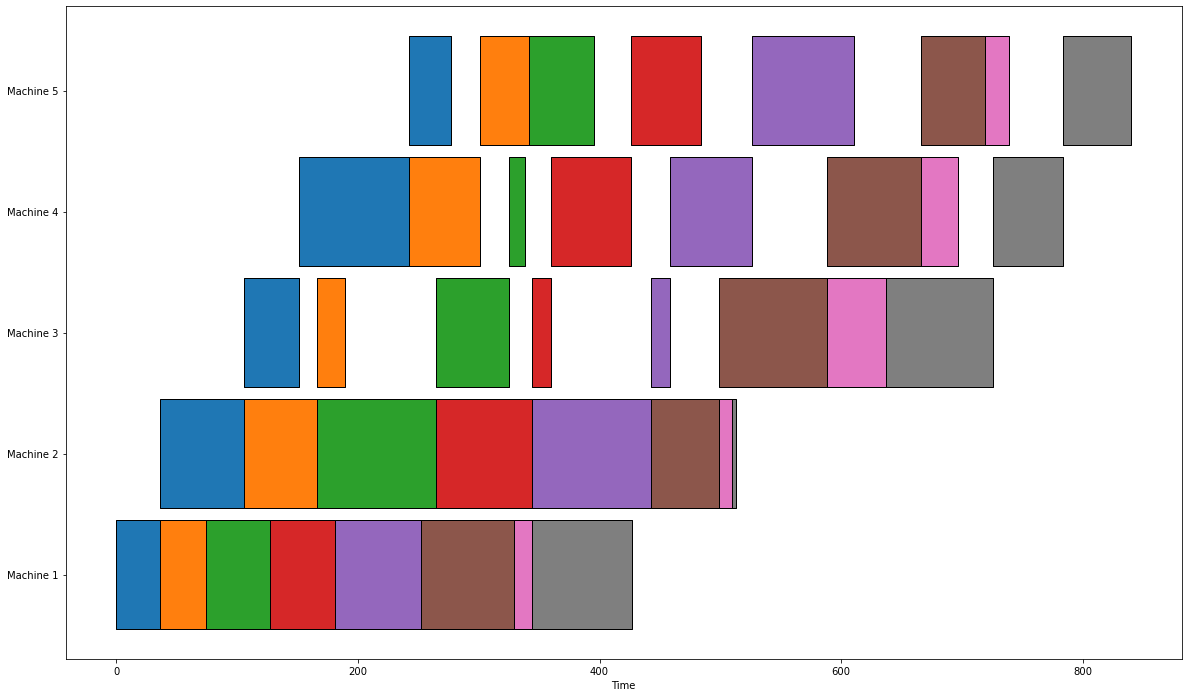

In [15]:
solver.generate_gantt_chart(solution)